In [1]:
# looking at this as classification problem
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm

In [2]:
# Read integrateddata
df =pd.read_parquet('integratedData.parquet_v2.gz')

In [3]:
print(df.shape)
df.head()

(6826300, 20)


,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude
0,1999-01-01,0.0,40.3,0.00589,138.0,123.0,1.6,293.1,281.1,24.0,16.0,15.5,34.0,1.7,0.74,False,NaN,None,-117.975000,33.566667
1,1999-01-01,0.0,39.8,0.00590,137.2,123.0,1.6,293.1,281.2,24.0,16.0,15.5,35.0,1.7,0.74,False,NaN,None,-117.933333,33.566667
2,1999-01-01,0.0,38.2,0.00580,137.2,123.0,1.7,293.2,281.2,26.0,15.2,14.9,37.0,1.7,0.77,False,NaN,None,-117.891667,33.566667
3,1999-01-01,0.0,36.4,0.00567,137.3,49.0,1.8,293.3,280.3,27.0,15.0,14.8,38.0,1.8,0.76,False,NaN,None,-117.850000,33.566667
4,1999-01-01,0.0,33.8,0.00538,137.3,49.0,1.9,293.2,279.9,29.0,13.3,13.6,43.0,1.9,0.80,False,NaN,None,-117.808333,33.566667


In [4]:
# Choose only the data with fire occured 
df['fire_occurred'].unique()

array([False,  True])

In [5]:
# There are 1743 fires occured in this integrated data as gridme represnted of rectangule polygon.
# historical perimeters consist of 176 first. will count on this integrated dataset first then will explor more
dff=df[df['fire_occurred']==True]
dff.head()
print(dff.shape)

(2167, 20)


In [13]:
dff.columns

Index(['date', 'precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'fire_occurred', 'acres_burned', 'fire_name', 'longitude', 'latitude',
       'month', 'day', 'year'],
      dtype='object')

In [14]:
dff['acres_burned'].nunique()

429

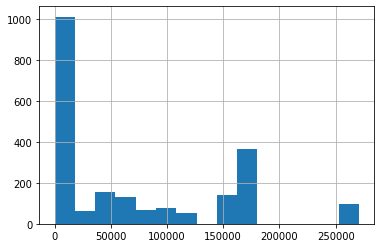

In [15]:
# Distribution of acres burned 
import matplotlib.pyplot as plt
# plt.plot(dfu['acres_burned'])
# plt.ylabel('acres burned')
hist =dff['acres_burned'].hist(bins=15)

In [16]:
dff['acres_burned'].count()

2167

In [17]:
# add three more features 
dff['month'] = dff.apply(lambda row: row.date.month, axis = 1)
dff['day']   = dff.apply(lambda row: row.date.day, axis = 1)
dff['year'] = dff.apply(lambda row: row.date.year, axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [18]:
dff.head()

,date,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,...,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,fire_occurred,acres_burned,fire_name,longitude,latitude,month,day,year
1021229,2001-01-03,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,...,4.8,1.73,True,10438.019531,VIEJAS,-116.766667,32.816667,1,3,2001
1021230,2001-01-03,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,...,4.8,1.56,True,10438.019531,VIEJAS,-116.725000,32.816667,1,3,2001
1021231,2001-01-03,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,...,4.9,1.46,True,10438.019531,VIEJAS,-116.683333,32.816667,1,3,2001
1021275,2001-01-03,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,...,4.6,1.82,True,10438.019531,VIEJAS,-116.850000,32.775000,1,3,2001
1021276,2001-01-03,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,...,4.5,1.75,True,10438.019531,VIEJAS,-116.808333,32.775000,1,3,2001


In [19]:
# as we are examing the severity , remove date,fire name and fire occured and include day & month & year features 
dff=dff.drop(['date','fire_name', 'fire_occurred'], axis=1)
dff.head()

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,dead_fuel_moisture_1000hr_Percent,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day,year
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,9.5,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3,2001
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,8.6,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3,2001
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,7.9,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3,2001
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,11.3,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3,2001
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,10.6,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3,2001


In [20]:
dff.shape

(2167, 20)

In [21]:
# First assumption, these threshold of small, medium and large fires are derived based on congresssional research study
dfm=dff
# p1= 0
# p2=10
# p3=250
# # p4=3000
p1= 0
p2=50000
p3=150000
c0=dfm['acres_burned']>p1
c1=dfm['acres_burned'] <=p2
c2=dfm['acres_burned'] >p2
c3 = dfm['acres_burned'] <=p3
c4 =dfm['acres_burned'] > p3
# c5=dfm['acres_burned'] <= p4
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm1= dfm[c0 & c1]
dfm2=dfm[c2 & c3]
dfm3=dfm[c4]
# dfm_4 =dfm[c6 & c7]
# dfm_4 =dfm[c8]

In [22]:
# Distriubiton of samples looks reasonable
print(dfm1.count()[1])
print(dfm2.count()[1])
print(dfm3.count()[1])

1189
375
603


In [23]:
# Fires per year 
dff['year'].value_counts()

2007    1077
2003     174
2012     148
2014     134
2013      88
2011      83
2002      75
2006      73
2005      57
2004      53
2016      47
2017      40
2010      31
2008      28
2001      17
2015      15
2009      15
2018      12
Name: year, dtype: int64

In [24]:
# Lable the output as 0 for small, 1 for meidum and 2 for large fires 
dfm1['label'] = 0
dfm2['label'] = 1
dfm3['label'] =2
dfmt=pd.concat([dfm1, dfm2, dfm3])
dfmt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,...,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day,year,label
1021229,0.0,9.9,0.00191,147.2,37.0,4.4,297.0,281.2,68.0,6.9,...,72.0,4.8,1.73,10438.019531,-116.766667,32.816667,1,3,2001,0
1021230,0.0,9.8,0.00195,145.1,54.0,4.9,295.2,280.8,76.0,6.3,...,77.0,4.8,1.56,10438.019531,-116.725000,32.816667,1,3,2001,0
1021231,0.0,10.1,0.00180,142.9,54.0,5.4,294.1,279.8,83.0,5.9,...,81.0,4.9,1.46,10438.019531,-116.683333,32.816667,1,3,2001,0
1021275,0.0,9.5,0.00209,149.7,37.0,3.7,298.7,280.4,54.0,9.3,...,61.0,4.6,1.82,10438.019531,-116.850000,32.775000,1,3,2001,0
1021276,0.0,9.5,0.00199,149.3,37.0,3.9,297.7,280.3,58.0,8.4,...,65.0,4.5,1.75,10438.019531,-116.808333,32.775000,1,3,2001,0


In [25]:
dfmt.columns

Index(['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'acres_burned', 'longitude', 'latitude', 'month', 'day', 'year',
       'label'],
      dtype='object')

In [27]:
# The target is to see the fire sverity of 2003 year 
# It is the best option as most of fire distribution happen in 2003 & 2007
# dfmtt1=dfmt[dfmt['year']==2014]
# dfmtt2=dfmt[dfmt['year']==2016]
# dfmtt3=dfmt[dfmt['year']==2017]
dfmtt4=dfmt[dfmt['year']==2003]
# print(dfmtt1.shape)
# print(dfmtt2.shape)
# print(dfmtt3.shape)
print(dfmtt4.shape)


(174, 21)


In [31]:
dfmtt4.columns

Index(['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'acres_burned', 'longitude', 'latitude', 'month', 'day', 'year',
       'label'],
      dtype='object')

In [32]:
features= ['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'acres_burned', 'longitude', 'latitude', 'month', 'day', 'year']

In [70]:
# Use only 2003 year as of target (test unseen data) and shuffle the data 
#dfmttest=pd.concat([dfmtt1,dfmtt2,dfmtt3,dfmtt4])

dfmttest=pd.concat([dfmtt4])
dfmttest = dfmttest.sample(frac=1)
xt=dfmttest[features].values
yt=dfmttest['label'].values
import numpy as np
uniqueValues, occurCount = np.unique(yt, return_counts=True)
print(uniqueValues, occurCount)
# Distrubiton of classes/labels looks resonable 

[0 1 2] [51 27 96]


In [71]:
# Use train dataset as all years except 2003 and shuffle the data
#dfmt[(dfmt.year != 0) & (df.line_race != 10)]
#dfmtt=dfmt[(dfmt.year != 2016) & (dfmt.year != 2014) & (dfmt.year != 2017) & (dfmt.year != 2003)]
dfmtt=dfmt[(dfmt.year != 2003)]
dfmtt = dfmtt.sample(frac=1)
x=dfmtt[features].values
y=dfmtt['label'].values
uniqueValues, occurCount = np.unique(y, return_counts=True)
print(uniqueValues, occurCount)

[0 1 2] [1138  348  507]


In [72]:
# Calculate matrics f1 score accuracy based on Randomforestclassifier
# As per evaluation effort, Randomforestclassifier alwasy proivde better result 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
Clf = RandomForestClassifier(criterion='gini')
Clf.fit(x, y) 
y_pred=Clf.predict(xt)
vaild_acc = metrics.f1_score(yt, y_pred, average='micro')
print ('Valid accuracy of  = '+ str(vaild_acc))


Valid accuracy of  = 0.9540229885057472


In [73]:
# Classifciation report 
from sklearn.metrics import classification_report
vaild_acc2 = classification_report(yt, y_pred)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc2)) 

Valid accuracy =               precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       1.00      0.70      0.83        27
           2       1.00      1.00      1.00        96

    accuracy                           0.95       174
   macro avg       0.95      0.90      0.92       174
weighted avg       0.96      0.95      0.95       174



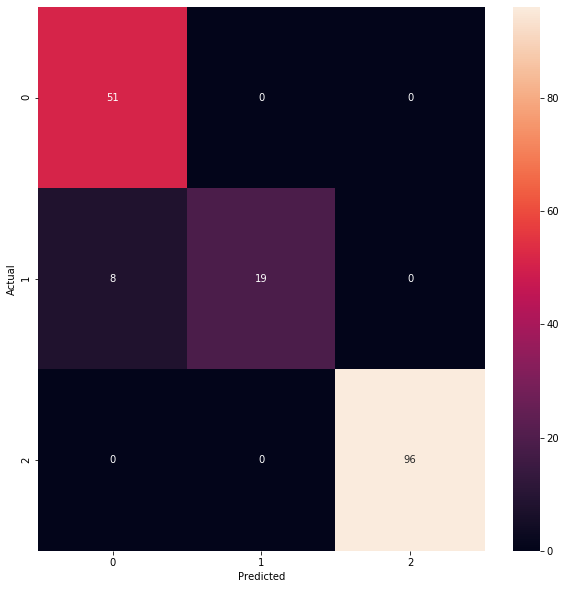

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
conf_mat = confusion_matrix(yt, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [78]:
# Want to evaluate each year as output /target to calculate the accuracy of each 
yy=dff['year'].unique().tolist()
yy


[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [79]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
for s in yy:
    dfmtt4=dfmt[dfmt['year']==s]
    dfmttest=pd.concat([dfmtt4])
    dfmttest = dfmttest.sample(frac=1)
    xt=dfmttest[features].values
    xt = min_max_scaler.fit_transform(xt)
    yt=dfmttest['label'].values
    uniqueValuestest, occurCountest = np.unique(yt, return_counts=True)
    print('The unique labels ' +str(uniqueValuestest) +' and counts of ' + str(occurCountest) + ' in year of '+str(s)+ ' for test data')
    dfmtt=dfmt[(dfmt.year != s)]
    dfmtt = dfmtt.sample(frac=1)
    x=dfmtt[features].values
    x= min_max_scaler.fit_transform(x)
    y=dfmtt['label'].values
    uniqueValuestrain, occurCountrain = np.unique(y, return_counts=True)
    print('The unique labels ' +str(uniqueValuestrain) +' and counts of ' + str(occurCountrain) + ' in year of '+str(s)+ ' for train data ')
    Clf1 = RandomForestClassifier(criterion='gini')
    Clf1.fit(x, y) 
    y_pred1=Clf1.predict(xt)
    vaild_acc = metrics.f1_score(yt, y_pred1, average='micro')
    print ('Valid accuracy of  ' + str(s) +" = "+ str(vaild_acc))

    

The unique labels [0] and counts of [17] in year of 2001 for test data
The unique labels [0 1 2] and counts of [1172  375  603] in year of 2001 for train data 
Valid accuracy of  2001 = 0.5882352941176471
The unique labels [0 1] and counts of [41 34] in year of 2002 for test data
The unique labels [0 1 2] and counts of [1148  341  603] in year of 2002 for train data 
Valid accuracy of  2002 = 0.5466666666666666
The unique labels [0 1 2] and counts of [51 27 96] in year of 2003 for test data
The unique labels [0 1 2] and counts of [1138  348  507] in year of 2003 for train data 
Valid accuracy of  2003 = 0.8448275862068967
The unique labels [0] and counts of [53] in year of 2004 for test data
The unique labels [0 1 2] and counts of [1136  375  603] in year of 2004 for train data 
Valid accuracy of  2004 = 0.8867924528301887
The unique labels [0] and counts of [57] in year of 2005 for test data
The unique labels [0 1 2] and counts of [1132  375  603] in year of 2005 for train data 
Valid

In [89]:
# Want to evaluate the threshold for small, medium and large fires that provided by SDGE 
dfms=dff
p1= 0
p2=10
p3=250
# # p4=3000
# p1= 0
# p2=50000
# p3=150000
c0=dfms['acres_burned']>p1
c1=dfms['acres_burned'] <=p2
c2=dfms['acres_burned'] >p2
c3 = dfms['acres_burned'] <=p3
c4 =dfms['acres_burned'] > p3
# c5=dfm['acres_burned'] <= p4
# c6=dfm['acres_burned'] >85468
# c7=dfm['acres_burned'] <= 163000
# c8=dfm['acres_burned'] >163000
dfm1= dfms[c0 & c1]
dfm2=dfms[c2 & c3]
dfm3=dfms[c4]
# dfm_4 =dfm[c6 & c7]
# dfm_4 =dfm[c8]


In [91]:
# print out samples of each labels and see there is obvious class imbalance based on san diego county data
print(dfm1.count()[1])
print(dfm2.count()[1])
print(dfm3.count()[1])

36
277
1854


In [92]:
# Lable the output as 0 for small, 1 for meidum and 2 for large fires based on SDGE thresholds 
dfm1['label'] = 0
dfm2['label'] = 1
dfm3['label'] =2
dfmt=pd.concat([dfm1, dfm2, dfm3])
dfmt.head()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,precipitation_amount_mm,relative_humidity_%,specific_humidity_kg/kg,surface_downwelling_shortwave_flux_in_air_W m-2,wind_from_direction_Degrees Clockwise from north,wind_speed_m/s,max_air_temperature_K,min_air_temperature_K,burning_index_g_Unitless,dead_fuel_moisture_100hr_Percent,...,energy_release_component-g_Unitless,potential_evapotranspiration_mm,mean_vapor_pressure_deficit_kPa,acres_burned,longitude,latitude,month,day,year,label
2598868,0.0,27.4,0.00484,192.4,341.0,2.3,292.9,280.9,33.0,10.9,...,46.0,2.8,0.90,4.767303,-117.808333,33.566667,2,11,2004,0
2663254,0.0,25.1,0.00554,277.4,54.0,4.3,299.3,281.7,32.0,16.6,...,31.0,5.7,1.39,8.136972,-117.058333,33.275000,3,28,2004,0
2728680,0.0,18.7,0.00523,340.5,234.0,2.4,304.0,288.3,43.0,9.8,...,59.0,6.7,2.28,6.278606,-116.975000,33.275000,5,14,2004,0
2728728,0.0,18.9,0.00543,339.4,247.0,2.3,303.6,287.0,41.0,10.2,...,57.0,6.5,2.13,6.278606,-116.975000,33.233333,5,14,2004,0
2729741,0.0,11.9,0.00461,345.2,238.0,2.9,301.7,283.6,59.0,6.8,...,77.0,6.7,1.94,4.793622,-116.766667,33.566667,5,15,2004,0


In [99]:
# The target is to see the fire sverity of 2003 year 
# It is the best option as most of fire distribution happen in 2003 & 2007
dfmtt1=dfmt[dfmt['year']==2003]
print(dfmtt1.shape)


(174, 21)


In [100]:

features= ['precipitation_amount_mm', 'relative_humidity_%',
       'specific_humidity_kg/kg',
       'surface_downwelling_shortwave_flux_in_air_W m-2',
       'wind_from_direction_Degrees Clockwise from north', 'wind_speed_m/s',
       'max_air_temperature_K', 'min_air_temperature_K',
       'burning_index_g_Unitless', 'dead_fuel_moisture_100hr_Percent',
       'dead_fuel_moisture_1000hr_Percent',
       'energy_release_component-g_Unitless',
       'potential_evapotranspiration_mm', 'mean_vapor_pressure_deficit_kPa',
       'acres_burned', 'longitude', 'latitude', 'month', 'day', 'year']

In [108]:
# Use only 2003 year as of target (test unseen data) and shuffle the data. AS you can see there is no 0 fires in 2003  
dfmttest=pd.concat([dfmtt1])
dfmttest = dfmttest.sample(frac=1)
xt1=dfmttest[features].values
yt1=dfmttest['label'].values
import numpy as np
uniqueValues, occurCount = np.unique(yt, return_counts=True)
print(uniqueValues, occurCount)
# Distrubiton of classes/labels looks resonable 

[1 2] [  8 166]


In [109]:
# Use train dataset as all years except 2003 and shuffle the data
#dfmt[(dfmt.year != 0) & (df.line_race != 10)]
#dfmtt=dfmt[(dfmt.year != 2016) & (dfmt.year != 2014) & (dfmt.year != 2017) & (dfmt.year != 2003)]
dfmtt=dfmt[(dfmt.year != 2003)]
dfmtt = dfmtt.sample(frac=1)
x1=dfmtt[features].values
y1=dfmtt['label'].values
uniqueValues, occurCount = np.unique(y, return_counts=True)
print(uniqueValues, occurCount)


[0 1 2] [  36  269 1688]


In [110]:
# Calculate matrics f1 score accuracy based on Randomforestclassifier
# As per evaluation effort, Randomforestclassifier alwasy proivde better result 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
Clf1 = RandomForestClassifier(criterion='gini')
Clf1.fit(x1, y1) 
y_pred1=Clf1.predict(xt1)
vaild_acc1 = metrics.f1_score(yt1, y_pred1, average='micro')
print ('Valid accuracy of  = '+ str(vaild_acc1))

Valid accuracy of  = 1.0


In [111]:
# Classifciation report 
from sklearn.metrics import classification_report
vaild_acc22 = classification_report(yt1, y_pred1)
#print ('Test accuracy = ' + str(accuracy))# + ' at alpha = ' + str(alpha))
print ('Valid accuracy = ' + str(vaild_acc22)) 


Valid accuracy =               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00       166

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



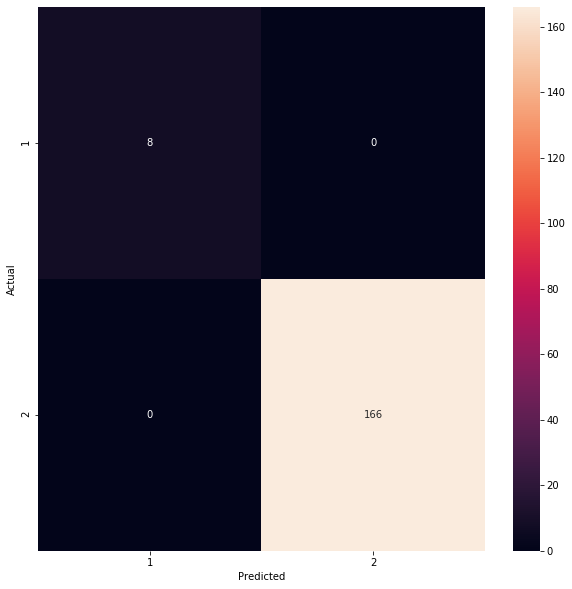

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
conf_mat = confusion_matrix(yt1, y_pred1)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=np.unique(yt1), yticklabels=np.unique(yt1))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
